In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science Training/Assignment 2/raw_house_data.csv')

## Data Cleaning

In [ ]:
data=data.dropna()

In [ ]:
data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms
count,4.990000e+03,4.990000e+03,4990.000000,4990.000000,4990.000000,4990.000000,4.990000e+03,4990.000000,4990.000000
mean,2.130720e+07,7.749513e+05,85723.223447,-110.911893,32.309526,4.661317,9.412291e+03,1992.316433,3.935471
std,2.257876e+06,3.187799e+05,37.838772,0.120623,0.176727,51.685230,1.731116e+05,65.542978,1.245817
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.000000,1.000000
25%,2.140750e+07,5.850000e+05,85718.000000,-110.979109,32.277974,0.580000,4.807892e+03,1987.000000,3.000000
50%,2.161501e+07,6.750000e+05,85737.000000,-110.923309,32.318570,0.990000,6.227810e+03,1999.000000,4.000000
75%,2.180494e+07,8.367500e+05,85749.000000,-110.859025,32.394625,1.757500,8.091920e+03,2006.000000,4.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.000000,36.000000


In [ ]:
print(data.columns,len(data.columns))

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object') 16


In [ ]:
data.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4,6842,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8,12025,4,"Dishwasher, Garbage Disposal, Oven",6,"Carpet, Natural Stone, Wood, Other",0
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8,8921,4,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5,"Carpet, Natural Stone, Wood",220
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7,5238,3,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1,"Carpet, Natural Stone, Wood, Other",421
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6,6480,3,"Dishwasher, Double Sink, Electric Range, Freez...",2,"Carpet, Concrete",141.67


#### Removing the entries where square footage is None

In [ ]:
data_clean = data[data['sqrt_ft']!='None']

In [ ]:
print(len(data_clean))

4944


In [ ]:
cols = list(data_clean.columns)
for col in cols:
  if(data_clean[col].dtype==object):
    print(col," Unique values : ",data_clean[col].unique())

bathrooms  Unique values :  ['10' '2' '5' '6' '4' '8' '7' '3' '15' '4.5' '1' '9' '11' '18' '14' '3.5'
 '35' '2.5' '36']
sqrt_ft  Unique values :  ['10500' '7300' '9019' ... '2106' '3601' '1772']
garage  Unique values :  ['0' '4' '3' '5' '2' '6' '15' '8' 'None' '7' '4.5' '3.5' '2.5' '1' '9'
 '22' '30' '12' '10' '11' '20' '13']
kitchen_features  Unique values :  ['Dishwasher, Freezer, Refrigerator, Oven' 'Dishwasher, Garbage Disposal'
 'Dishwasher, Double Sink, Pantry: Butler, Refrigerator' ...
 'Dishwasher, Electric Range, Island, Refrigerator, Reverse Osmosis, Appliance Color: Stainless'
 'Dishwasher, Double Sink, Garbage Disposal, Gas Range, Pantry: Cabinet, Appliance Color: Stainless, Countertops: Granite slab, Microwave: Stainless over oven, Oven: wall'
 'Compactor, Dishwasher, Double Sink, Island, Appliance Color: Stainless']
fireplaces  Unique values :  ['6' '5' '4' '1' '2' '3' '7' '0' '9' '8']
floor_covering  Unique values :  ['Mexican Tile, Wood' 'Natural Stone, Other'
 'Ceramic

In [ ]:
data_clean.loc[data_clean['garage']=='None','garage']='0'
data_clean.loc[data_clean['HOA']=='None','HOA']='0'

In [ ]:
def create_list(value):
  splitted = value.split(',')
  stripped = [element.strip() for element in splitted]
  return stripped

def price_per_sqft(price,sqft):
  price = float(price)
  sqft = float(sqft)
  if sqft>0:
    return price/sqft
  else:
    return 0


In [ ]:
print(create_list('Dishwasher, Freezer, Refrigerator, Oven'))
# data_clean[['sold_price','sqrt_ft']].head(10)

['Dishwasher', 'Freezer', 'Refrigerator', 'Oven']


In [ ]:
data_clean['kitchen_features_list'] = data_clean['kitchen_features'].apply(create_list)
data_clean['price_sqft'] = data_clean.apply(lambda row: price_per_sqft(row['sold_price'], row['sqrt_ft']), axis=1)
data_clean = data_clean[(data_clean['price_sqft'] != 0)]
data_clean.head(1)

<ipython-input-369-632cc41b8908>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['kitchen_features_list'] = data_clean['kitchen_features'].apply(create_list)
<ipython-input-369-632cc41b8908>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['price_sqft'] = data_clean.apply(lambda row: price_per_sqft(row['sold_price'], row['sqrt_ft']), axis=1)


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,kitchen_features_list,price_sqft
0,21530491,5300000.0,85637,-110.3782,31.356362,2154.0,5272.0,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,"[Dishwasher, Freezer, Refrigerator, Oven]",504.761905


In [ ]:
print(len(data_clean['zipcode'].unique()))

56


In [ ]:
count_dict = {}
idx_list = {}
for idx,data_point in data_clean.iterrows():
  feature_list = data_point['kitchen_features_list']
  for feat in feature_list:
    if feat not in count_dict:
      count_dict[feat] = 1
      idx_list[feat] = [idx]
    else:
      count_dict[feat]+=1
      idx_list[feat].append(idx)
sorted_dict = dict(sorted(count_dict.items(), key=lambda item: item[1],reverse=True))
print(sorted_dict,len(sorted_dict),sep='\n')

{'Dishwasher': 4804, 'Garbage Disposal': 4470, 'Refrigerator': 4184, 'Oven': 2859, 'Microwave': 2558, 'Gas Range': 1278, 'Appliance Color: Stainless': 1268, 'Island': 1221, 'Double Sink': 1129, 'Countertops: Granite': 780, 'Pantry: Walk-In': 630, 'Compactor': 422, 'Pantry: Closet': 410, 'Freezer': 394, 'Electric Range': 384, 'Lazy Susan': 323, 'Desk': 320, 'Pantry: Cabinet': 303, 'Prep Sink': 297, 'Wet Bar': 224, 'Reverse Osmosis': 210, 'Warming Drawer': 208, 'Countertops: granite': 186, 'Water Purifier': 163, 'Microwave: Stainless': 152, 'Appliance Color: Black': 146, 'Oven: Double': 109, 'Oven: Stainless': 107, 'Countertops: Quartz': 81, 'Pantry: Butler': 73, 'Microwave: Built In': 64, 'Appliance Color: White': 64, 'Oven: .': 54, 'Indoor Grill': 51, 'Microwave: yes': 50, 'Microwave: .': 49, 'Microwave: Built-in': 48, 'Oven: yes': 46, 'Microwave: Microwave': 45, 'Oven: Oven': 41, 'Countertops: Tile': 41, 'Microwave: Built in': 35, 'Microwave: stainless': 34, 'Appliance Color: Other': 

In [ ]:
important_feats_kitchen = []
for k, v in sorted_dict.items():
  if v>400 and v<4000:
    important_feats_kitchen.append(k)
print(important_feats_kitchen)

['Oven', 'Microwave', 'Gas Range', 'Appliance Color: Stainless', 'Island', 'Double Sink', 'Countertops: Granite', 'Pantry: Walk-In', 'Compactor', 'Pantry: Closet']


['Refrigerator', 'Microwave', 'Dishwasher']
3


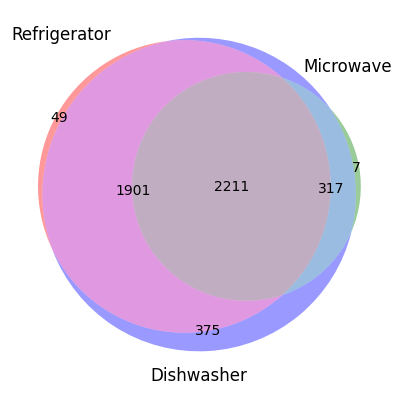

In [ ]:
kitchen_types = ['Refrigerator', 'Microwave', 'Dishwasher']#list(sorted_dict.keys())[0:3]
print(kitchen_types)
ls = []
for floor_type in kitchen_types:
  ls.append(set(idx_list[floor_type]))

print(len(ls))
venn3(ls, (kitchen_types))

plt.show()

In [ ]:
data_clean['floor_covering_list'] = data_clean['floor_covering'].apply(create_list)
data_clean.head(1)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,kitchen_features_list,price_sqft,floor_covering_list
0,21530491,5300000.0,85637,-110.3782,31.356362,2154.0,5272.0,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,"[Dishwasher, Freezer, Refrigerator, Oven]",504.761905,"[Mexican Tile, Wood]"


In [ ]:
count_dict = {}
idx_list = {}
for idx,data_point in data_clean.iterrows():
  feature_list = data_point['floor_covering_list']
  for feat in feature_list:
    if feat not in count_dict:
      count_dict[feat] = 1
      idx_list[feat] = [idx]
    else:
      count_dict[feat]+=1
      idx_list[feat].append(idx)
sorted_dict = dict(sorted(count_dict.items(), key=lambda item: item[1],reverse=True))
print(sorted_dict,len(sorted_dict),sep='\n')

{'Carpet': 3476, 'Ceramic Tile': 2496, 'Natural Stone': 1494, 'Wood': 1224, 'Concrete': 748, 'Mexican Tile': 651, 'Other': 267, 'Laminate': 79, 'Vinyl': 55, 'Other: Travertine': 25, 'Other: Porcelain Tile': 21, 'Other: Porcelain': 18, 'Other: Brick': 14, 'Other: Porcelain tile': 8, 'Indoor/Outdoor': 8, 'Other: Flagstone': 5, 'Other: Marble': 5, 'Other: Saltillo': 3, 'Other: Travertine Tile': 3, 'Other: Porcelain/Engineered': 3, 'Other: Slate': 3, 'Other: travertine': 3, 'Other: Brick Pavers': 2, 'Other: concrete tile': 2, 'Other: brick': 2, 'Other: Cork': 2, 'Other: porcelain tile': 2, 'Other: Italian Tile': 2, 'Other: Wood Laminate': 2, 'Other: Marble-Master Bath': 1, 'Granite': 1, 'Other: Quartzite': 1, 'Other: Porcelyn': 1, 'Other: Tile': 1, 'Other: CONCRETE TILE': 1, 'Other: Brick Floor': 1, 'Other: Lime Stone': 1, 'Other: Limestone': 1, 'Other: Multiple Types': 1, 'Other: Refinished Brick': 1, 'Other: studio laminate': 1, 'Other: Brick inlayed': 1, 'Other: Terrazzo': 1, 'Other: Ce

In [ ]:
important_feats_floor = []
for k, v in sorted_dict.items():
  if v>100 and v<4000:
    important_feats_floor.append(k)
print(important_feats_floor)

['Carpet', 'Ceramic Tile', 'Natural Stone', 'Wood', 'Concrete', 'Mexican Tile', 'Other']


#### Plotting the overlap between flooring types

['Carpet', 'Ceramic Tile', 'Natural Stone']
3


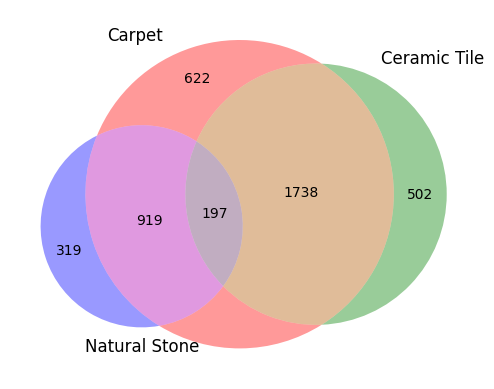

In [ ]:
floor_types = list(sorted_dict.keys())[:3]
print(floor_types)
ls = []
for floor_type in floor_types:
  ls.append(set(idx_list[floor_type]))

print(len(ls))
venn3(ls, ('Carpet', 'Ceramic Tile', 'Natural Stone'))

plt.show()

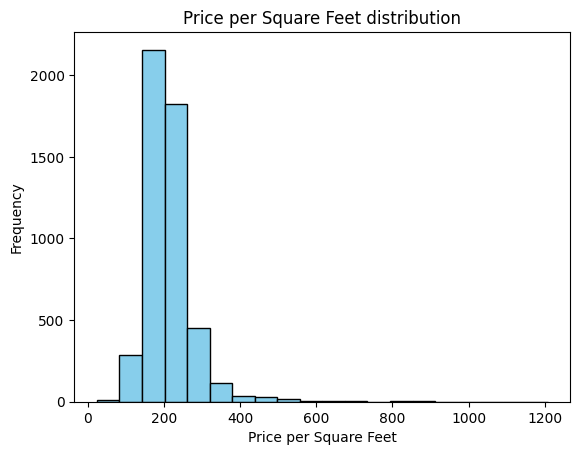

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data (replace this with your dataset)
d = data_clean['price_sqft']

# Plot histogram
plt.hist(d, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Price per Square Feet')
plt.ylabel('Frequency')
plt.title('Price per Square Feet distribution')

# Show the plot
plt.show()

In [ ]:
data_clean['sqrt_ft'] = data_clean['sqrt_ft'].astype(float)
data_clean['bedrooms'] = data_clean['bedrooms'].astype(float)
data_clean['bathrooms'] = data_clean['bathrooms'].astype(float)
data_clean['garage'] = data_clean['garage'].astype(float)
data_clean['fireplaces'] = data_clean['fireplaces'].astype(float)
# data_clean['bathrooms'] = data_clean['bathrooms'].astype(float)

In [ ]:
data_clean.loc[data_clean['sqrt_ft']>7500][['sold_price','sqrt_ft']].head(1)

,sold_price,sqrt_ft
0,5300000.0,10500.0


Text(0, 0.5, 'Price')

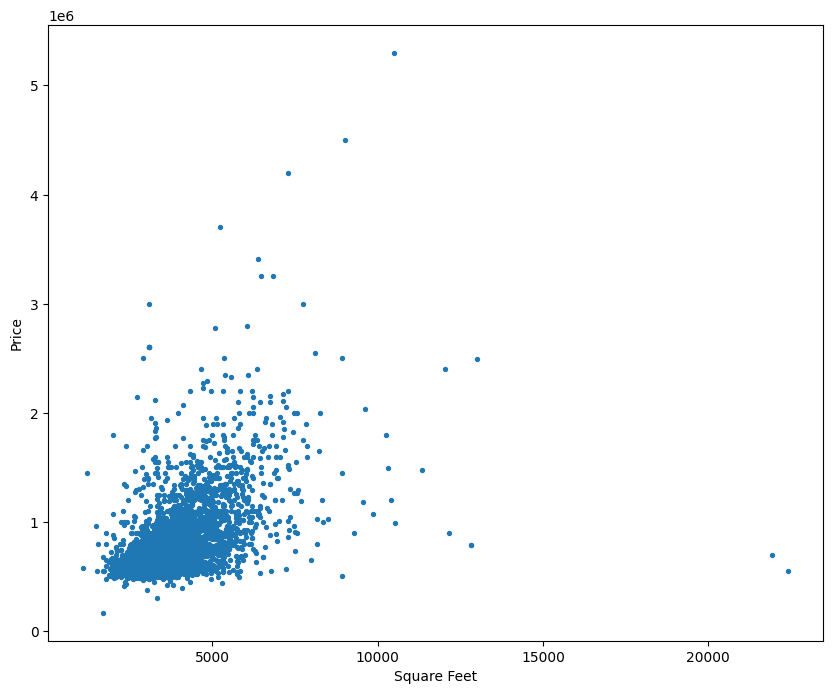

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(data_clean['sqrt_ft'],data_clean['sold_price'],s=8)
plt.xlabel("Square Feet")
plt.ylabel("Price")

In [ ]:
data_clean.loc[(data_clean['sqrt_ft']>11000) & (data_clean['sold_price']>10000)]

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,kitchen_features_list,price_sqft,floor_covering_list
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9.0,8.0,12025.0,4.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0,"[Dishwasher, Garbage Disposal, Oven]",199.584200,"[Carpet, Natural Stone, Wood, Other]"
35,21307177,2495000.0,85637,-110.740635,31.720431,131.00,1220.32,0,13.0,15.0,13000.0,0.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",4.0,"Carpet, Ceramic Tile, Mexican Tile",0,"[Compactor, Dishwasher, Freezer, Garbage Dispo...",191.923077,"[Carpet, Ceramic Tile, Mexican Tile]"
383,21306886,1480000.0,85750,-110.868335,32.332501,1.41,19421.93,1991,6.0,7.0,11336.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Ceramic Tile, Natural Stone, Vinyl",202,"[Dishwasher, Garbage Disposal, Refrigerator, M...",130.557516,"[Carpet, Ceramic Tile, Natural Stone, Vinyl]"
635,21731756,895000.0,85749,-110.799667,32.253627,11.57,26110.00,1948,19.0,18.0,12154.0,0.0,"Dishwasher, Garbage Disposal, Pantry: Walk-In,...",3.0,"Carpet, Mexican Tile, Other: Multiple Types",0,"[Dishwasher, Garbage Disposal, Pantry: Walk-In...",73.638308,"[Carpet, Mexican Tile, Other: Multiple Types]"
1063,21524602,785045.0,85648,-110.942071,31.552409,37.42,20744.74,2000,2.0,6.0,12808.0,2.5,None,3.0,"Ceramic Tile, Wood","1,290",[None],61.293332,"[Ceramic Tile, Wood]"
1065,4115890,785045.0,85646,-110.942060,31.552400,73.42,20761.44,2000,2.0,5.0,12808.0,2.0,"Desk, Dishwasher, Double Sink, Electric Range,...",3.0,"Ceramic Tile, Vinyl, Wood","1,290","[Desk, Dishwasher, Double Sink, Electric Range...",61.293332,"[Ceramic Tile, Vinyl, Wood]"
2111,4115949,550000.0,85645,-111.047350,31.701117,50.00,25113.45,1936,36.0,35.0,22408.0,0.0,Countertops: Stainless,1.0,"Ceramic Tile, Mexican Tile",0,[Countertops: Stainless],24.544805,"[Ceramic Tile, Mexican Tile]"
3277,21623780,695000.0,85645,-111.047260,31.701407,50.00,6520.66,1936,36.0,35.0,21915.0,0.0,Refrigerator,1.0,"Ceramic Tile, Mexican Tile",0,[Refrigerator],31.713438,"[Ceramic Tile, Mexican Tile]"


### Removing the outliers

In [ ]:
q3  = data_clean['sqrt_ft'].describe()['75%']
q1  = data_clean['sqrt_ft'].describe()['25%']
iqr = q3 - q1
print(q1,q3,iqr)
lower = q1 - 3*iqr
upper = q3 + 4.5*iqr
print(lower, upper)
data_clean = data_clean.loc[(data_clean['sqrt_ft']>lower) & (data_clean['sqrt_ft']<upper)]

NameError: ignored

In [ ]:
q3  = data_clean['sold_price'].describe()['75%']
q1  = data_clean['sold_price'].describe()['25%']
iqr = q3 - q1
print(iqr)
lower = q1 - 3*iqr
upper = q3 + 6*iqr
print(lower, upper)

data_clean = data_clean.loc[(data_clean['sold_price']>lower) & (data_clean['sold_price']<upper)]

251750.0
-170250.0 2347250.0


In [ ]:
len(data_clean)

4905

Text(0.5, 1.0, 'Scatter Plot')

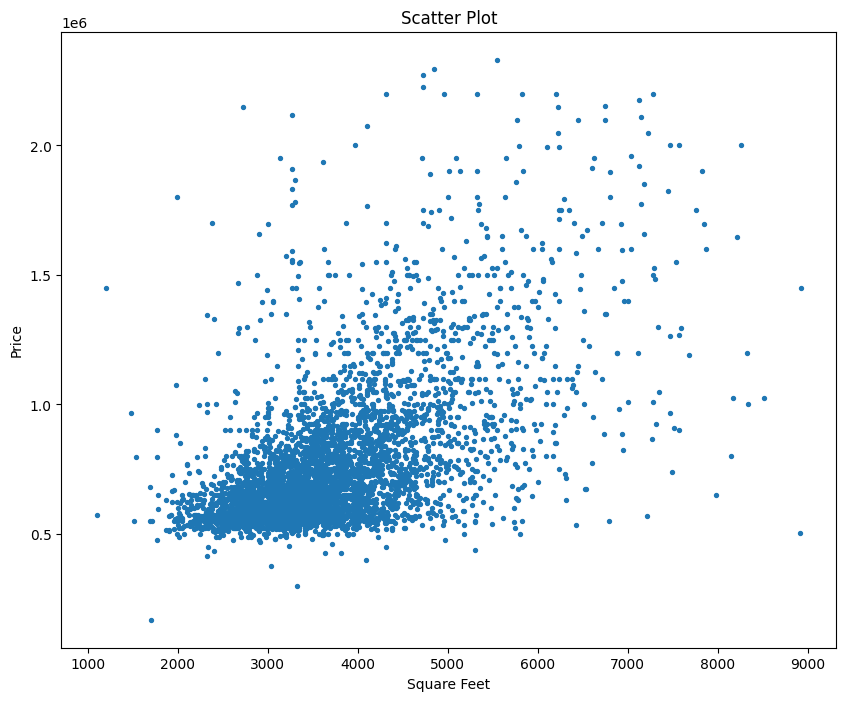

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(data_clean['sqrt_ft'],data_clean['sold_price'],s=8)
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Scatter Plot")

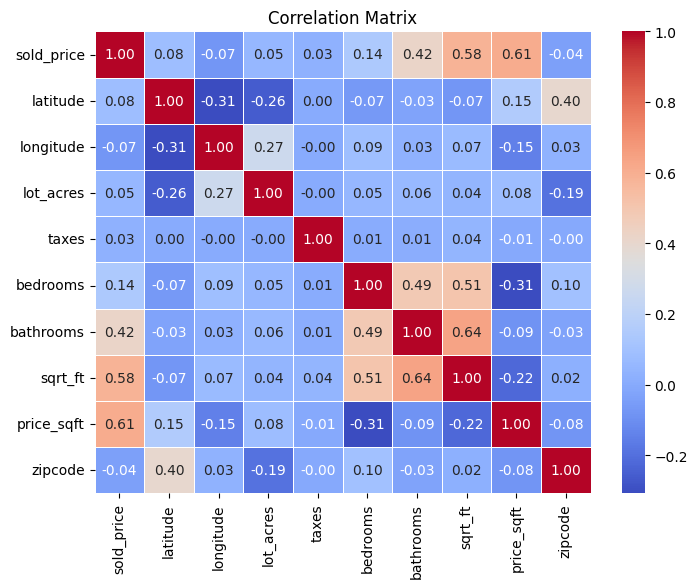

In [ ]:
correlation_matrix = data_clean[['sold_price','latitude',
                                 'longitude','lot_acres','taxes','bedrooms',
                                 'bathrooms','sqrt_ft','price_sqft','zipcode']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
def apply_feat(ls,value):
  if value in ls:
    return 1
  else:
    return 0
def calc_years(value):
  return 2023-int(value)

In [ ]:
data_clean['years_since_built'] = data_clean['year_built'].apply(calc_years)
for feat in important_feats_floor:
  data_clean[feat] = data_clean.apply(lambda row: apply_feat(row['floor_covering_list'], feat), axis=1)
for feat in important_feats_kitchen:
  data_clean[feat] = data_clean.apply(lambda row: apply_feat(row['kitchen_features_list'], feat), axis=1)

In [ ]:
data_clean.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA',
       'kitchen_features_list', 'price_sqft', 'floor_covering_list',
       'years_since_built', 'Carpet', 'Ceramic Tile', 'Natural Stone', 'Wood',
       'Concrete', 'Mexican Tile', 'Other', 'Oven', 'Microwave', 'Gas Range',
       'Appliance Color: Stainless', 'Island', 'Double Sink',
       'Countertops: Granite', 'Pantry: Walk-In', 'Compactor',
       'Pantry: Closet'],
      dtype='object')

In [ ]:
data_clean_filtered = data_clean.drop(columns=['MLS', 'kitchen_features','floor_covering', 'HOA',
       'kitchen_features_list', 'floor_covering_list','year_built'])

In [ ]:
data_clean_filtered.head(5)

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,...,Oven,Microwave,Gas Range,Appliance Color: Stainless,Island,Double Sink,Countertops: Granite,Pantry: Walk-In,Compactor,Pantry: Closet
11,2050000.0,85718,-110.918294,32.341609,1.65,24353.00,5.0,6.0,7230.0,3.0,...,1,1,0,0,0,0,0,0,0,0
12,2100000.0,85637,-110.736202,31.721347,29.60,11723.00,6.0,7.0,6454.0,3.0,...,1,1,0,0,0,0,0,0,0,0
13,2200000.0,85658,-111.049837,32.483063,1.82,5198.58,4.0,6.0,5826.0,3.0,...,1,1,0,0,0,0,0,0,1,0
21,2000000.0,85750,-110.848679,32.321134,0.64,11322.00,5.0,6.0,7471.0,3.0,...,1,1,0,0,0,0,0,0,1,0
23,1950000.0,85718,-110.933703,32.304249,13.16,16354.00,7.0,8.0,5645.0,2.0,...,1,0,0,0,0,0,0,0,0,0


['Carpet', 'Ceramic Tile', 'Natural Stone', 'Wood', 'Concrete', 'Mexican Tile', 'Other']


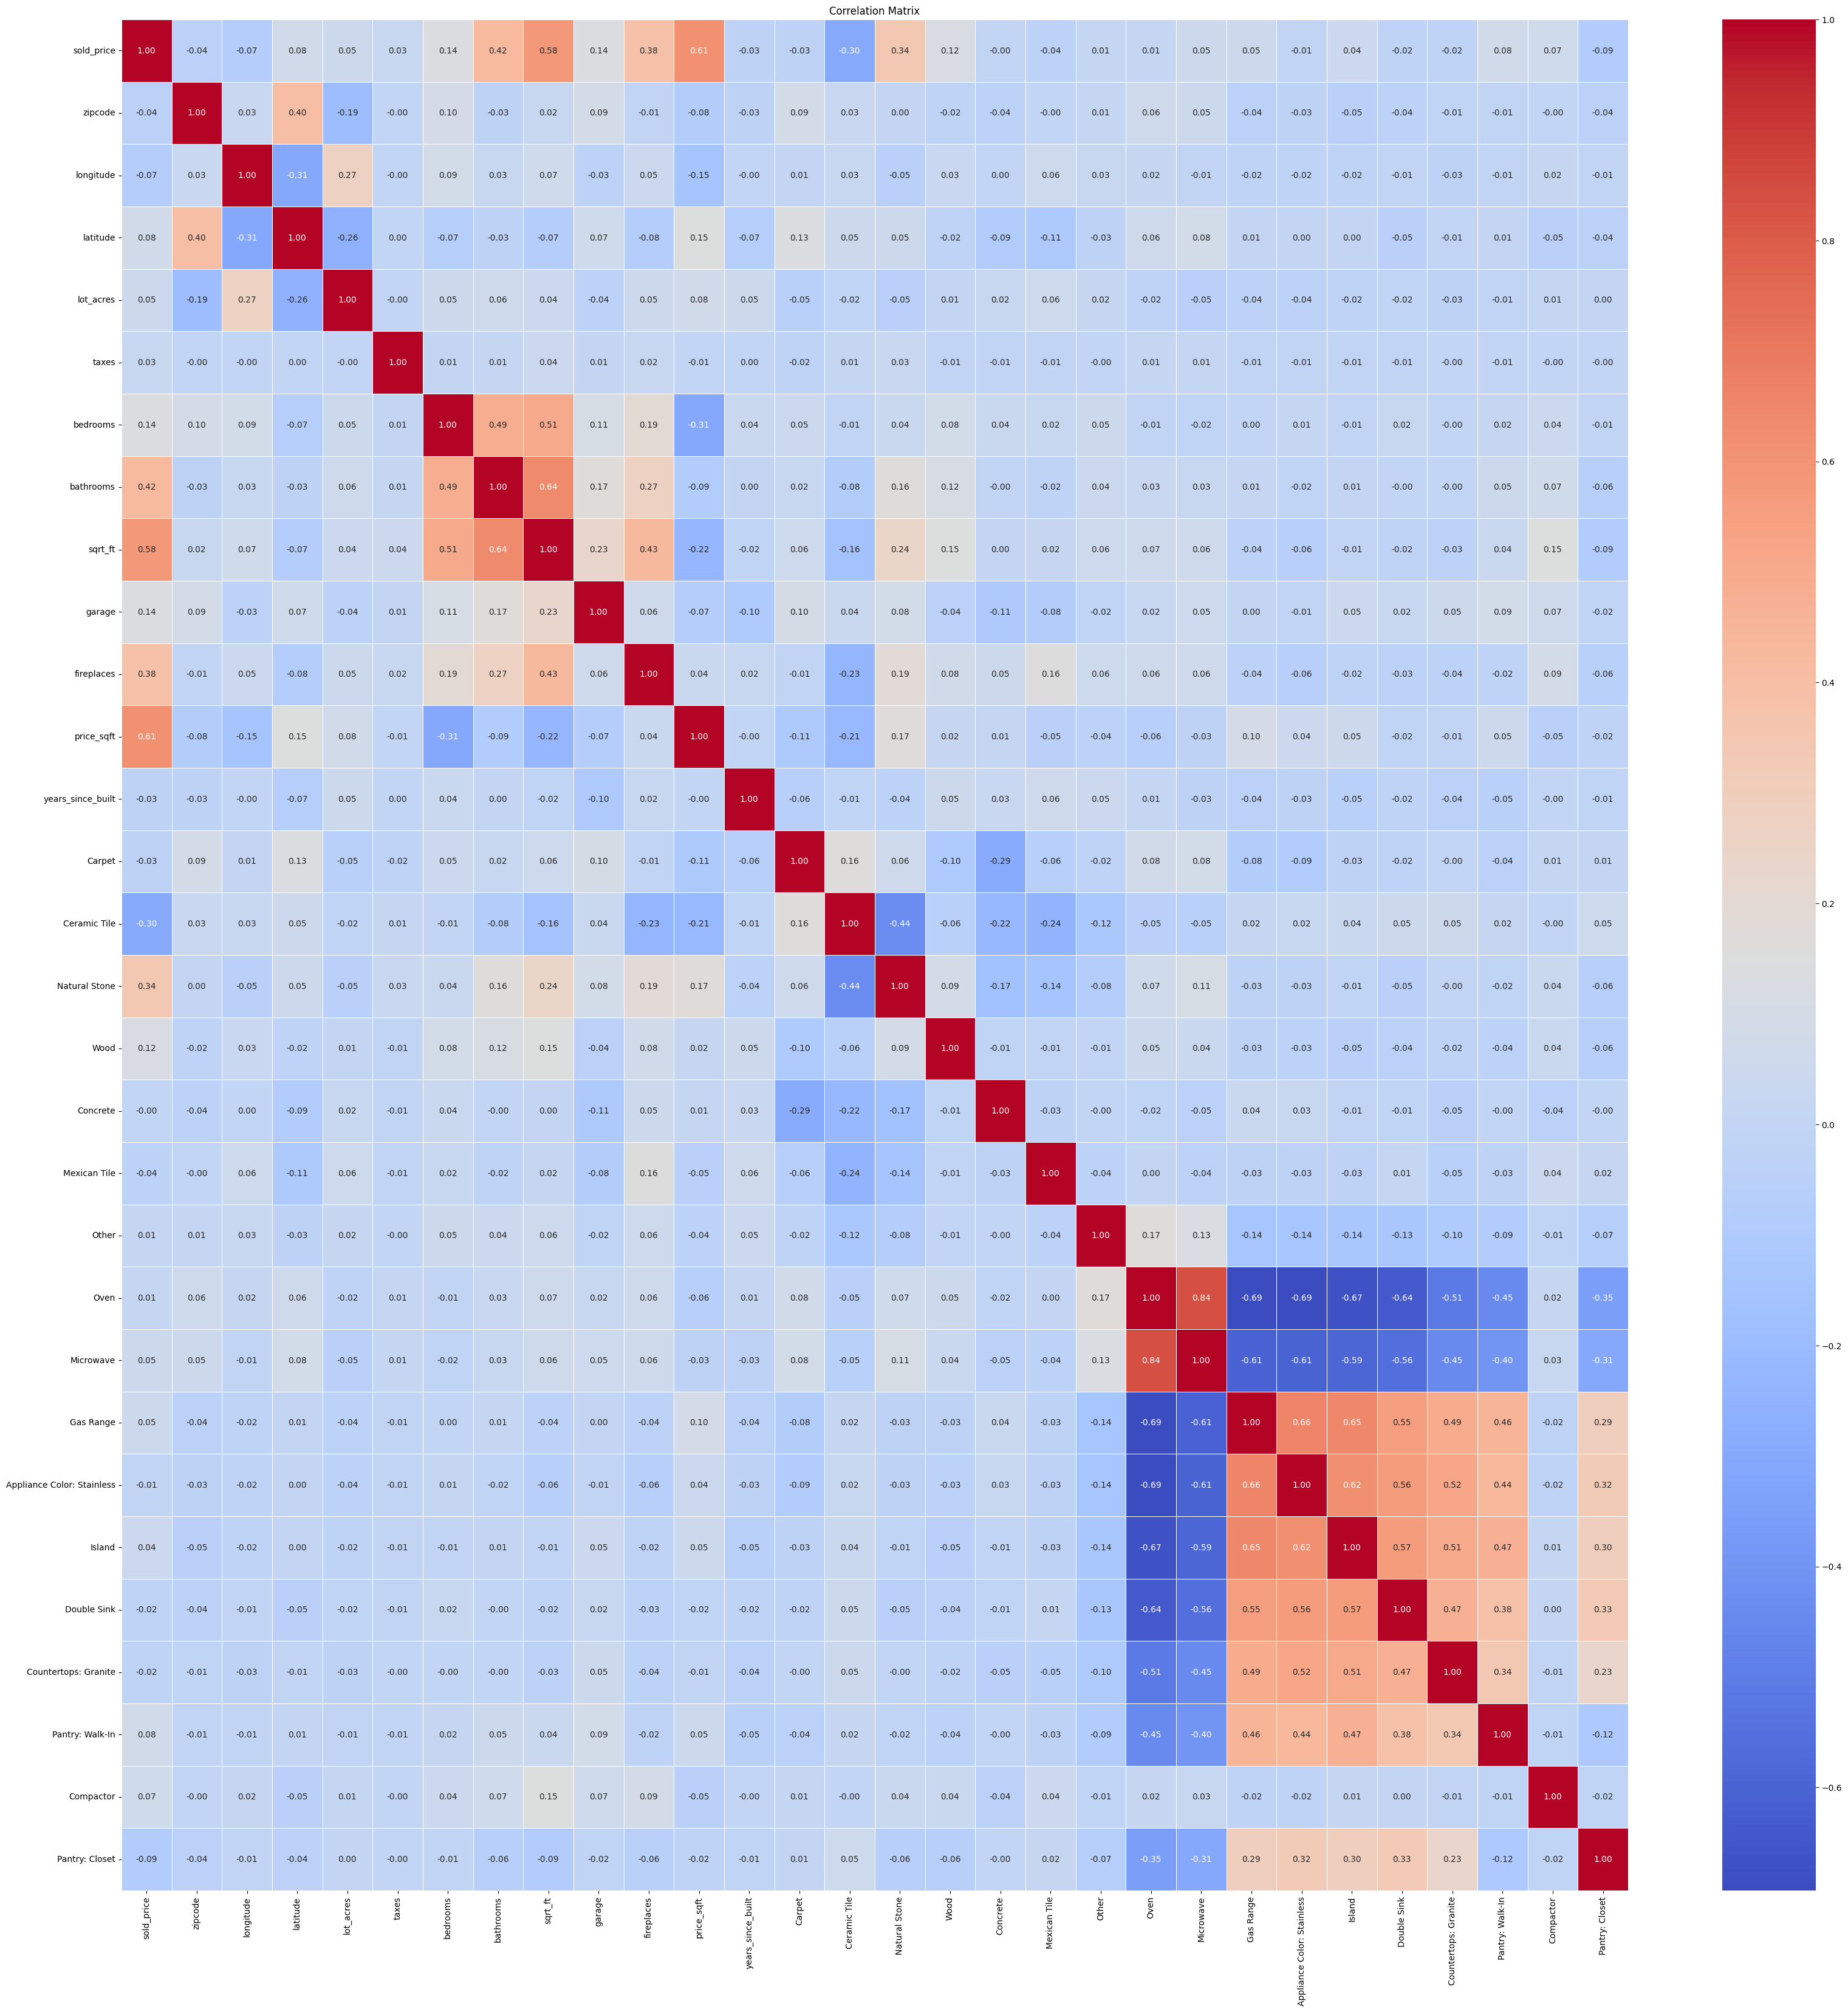

In [ ]:
# important_feats_floor.append('sold_price')
# important_feats_floor.append('years_since_built')

print(important_feats_floor)
correlation_matrix = data_clean_filtered.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data_clean_filtered['price_sqft'].describe()

count    4905.000000
mean      211.156648
std        60.491112
min        56.652457
25%       175.660483
50%       202.538482
75%       233.635241
max      1208.333333
Name: price_sqft, dtype: float64

### Creating Bins for price/sqft
* 0-100 = 1
* 100-200 = 2
* 200-300 = 3
* 300-400 = 4
* 500+ = 5


In [ ]:
def define_bins(value):
  if value <=100:
    return 1
  elif value >100 and value <=200:
    return 2
  elif value >200 and value <=300:
    return 3
  elif value >300 and value <=400:
    return 4
  elif value >400 and value <=500:
    return 5
  elif value >500:
    return 6

In [ ]:
data_clean_filtered['price_sqft_class'] = data_clean_filtered['price_sqft'].apply(define_bins)

In [ ]:
data_clean_filtered[['price_sqft','price_sqft_class']].head(10)

,price_sqft,price_sqft_class
11,283.540802,3
12,325.379610,4
13,377.617576,4
21,267.701780,3
23,345.438441,4
28,304.963545,4
31,364.140801,4
32,356.272267,4
33,329.264375,4
34,345.437018,4


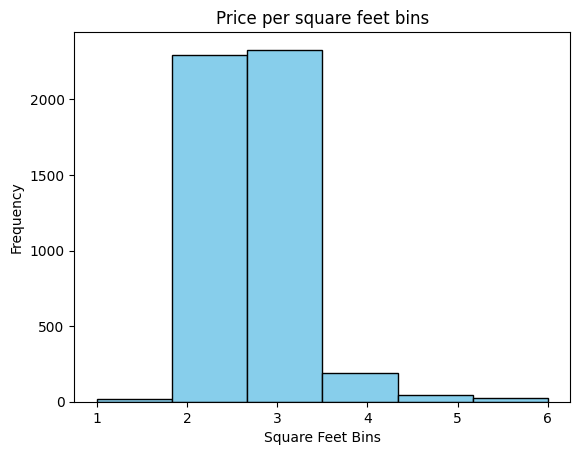

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data (replace this with your dataset)
d = data_clean_filtered['price_sqft_class']

# Plot histogram
plt.hist(d, bins=6, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Square Feet Bins')
plt.ylabel('Frequency')
plt.title('Price per square feet bins')

# Show the plot
plt.show()

['Carpet', 'Ceramic Tile', 'Natural Stone', 'Wood', 'Concrete', 'Mexican Tile', 'Other']


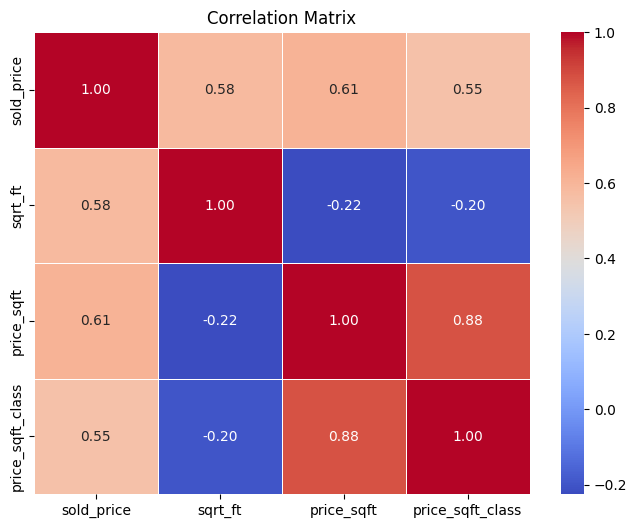

In [ ]:
# important_feats_floor.append('sold_price')
# important_feats_floor.append('years_since_built')

print(important_feats_floor)
correlation_matrix = data_clean_filtered[['sold_price','sqrt_ft','price_sqft','price_sqft_class']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Create Train Test Splits

In [ ]:
def train_test_split_custom(X, y, test_size=0.2, random_seed=None):
    if random_seed:
        np.random.seed(random_seed)

    # Shuffle indices
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Calculate the number of samples for the test set
    num_test_samples = int(test_size * len(X))

    # Split the indices into training and test sets
    test_indices = indices[:num_test_samples]
    train_indices = indices[num_test_samples:]

    # Split the data based on the indices
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [ ]:
def accuracy_score(y,y_hat):
  return np.mean(y==y_hat)

#### MIN-MAX Scaling

In [ ]:
def preProcess_minMax(data):
  data_min = data.min()
  data_max = data.max()
  scaled_data = ((data - data_min)/(data_max - data_min))
  return scaled_data

#### Standardization

In [ ]:
def preProcess_normalize(data):
  mean_values = np.mean(data, axis=0)
  std_values = np.std(data, axis=0)
  standardized_data = np.nan_to_num((data - mean_values) / std_values)
  return standardized_data

## Preprocessing the entire Dataset

In [ ]:
final_df = data_clean_filtered
statistics_df = final_df.describe().loc[['min', 'max', 'mean', 'std']]
columns_to_normalize = ['zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes',
       'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces',
       'price_sqft', 'years_since_built']
for col in columns_to_normalize:
  final_df[col] = (final_df[col] - final_df[col].min()) / (final_df[col].max() - final_df[col].min())

  # final_df[col] = (final_df[col] - final_df[col].mean()) / (final_df[col].std() + 1e-9 )
final_df.head(5)
final_test_df = final_df[4400:]
final_df = final_df[:4400]
print(len(final_df),len(final_test_df))

4400 505


In [ ]:
statistics_df

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,...,Microwave,Gas Range,Appliance Color: Stainless,Island,Double Sink,Countertops: Granite,Pantry: Walk-In,Compactor,Pantry: Closet,price_sqft_class
min,1.690000e+05,85118.000000,-112.520168,31.361562,0.000000,0.000000e+00,1.000000,1.000000,1100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.331000e+06,86323.000000,-109.454637,34.927884,555.600000,1.221508e+07,18.000000,36.000000,8928.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
mean,7.635733e+05,85724.260143,-110.911227,32.315724,3.037321,9.376683e+03,3.912130,3.793170,3678.196453,2.817227,...,0.518247,0.259327,0.256881,0.246891,0.228542,0.158410,0.127829,0.084811,0.083588,2.598165
std,2.693461e+05,36.712259,0.120073,0.167012,16.403567,1.746015e+05,0.912699,1.107582,963.214408,1.193366,...,0.499718,0.438310,0.436958,0.431247,0.419937,0.365162,0.333933,0.278629,0.276797,0.667802


### Create data set for KNN Classifier for predicting the expected bins

In [ ]:
X = final_df[['latitude','longitude']].to_numpy()
y = final_df['price_sqft_class'].to_numpy()

In [ ]:
final_df.head(10)

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,...,Microwave,Gas Range,Appliance Color: Stainless,Island,Double Sink,Countertops: Granite,Pantry: Walk-In,Compactor,Pantry: Closet,price_sqft_class
11,2050000.0,0.497925,0.522544,0.274806,0.002970,0.001994,0.235294,0.142857,0.783086,0.100000,...,1,0,0,0,0,0,0,0,0,3
12,2100000.0,0.430705,0.581944,0.100884,0.053276,0.000960,0.294118,0.171429,0.683955,0.100000,...,1,0,0,0,0,0,0,0,0,4
13,2200000.0,0.448133,0.479633,0.314470,0.003276,0.000426,0.176471,0.142857,0.603730,0.100000,...,1,0,0,0,0,0,0,1,0,4
21,2000000.0,0.524481,0.545253,0.269065,0.001152,0.000927,0.235294,0.142857,0.813873,0.100000,...,1,0,0,0,0,0,0,1,0,3
23,1950000.0,0.497925,0.517517,0.264330,0.023686,0.001339,0.352941,0.200000,0.580608,0.066667,...,0,0,0,0,0,0,0,0,0,4
28,2175000.0,0.497925,0.525033,0.273873,0.002286,0.001784,0.235294,0.142857,0.770567,0.100000,...,1,0,0,0,0,0,0,0,0,4
31,2100000.0,0.497925,0.524084,0.273577,0.001818,0.000474,0.176471,0.114286,0.596193,0.100000,...,0,1,1,1,1,0,1,0,0,4
32,1900000.0,0.524481,0.546808,0.271119,0.002088,0.001368,0.176471,0.085714,0.540751,0.100000,...,1,0,0,0,0,0,0,0,0,4
33,2050000.0,0.497925,0.513569,0.278064,0.005796,0.002199,0.176471,0.142857,0.654829,0.166667,...,1,0,0,0,0,0,0,0,0,4
34,2150000.0,0.497925,0.523374,0.274009,0.003438,0.001716,0.176471,0.142857,0.654573,0.100000,...,1,0,0,0,0,0,0,0,0,4


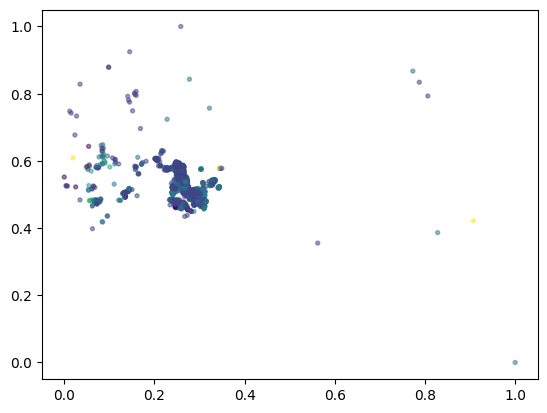

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.5,s=8)

In [ ]:
print(y)

[3 4 4 ... 2 3 2]


## SMOTE Implementation for class imbalance

In [ ]:
def smote(X, y, k=5, oversampling_ratio=1.0, random_seed=None, minority_class = None):

    if random_seed:
        np.random.seed(random_seed)
    if minority_class == None:
      minority_class = np.unique(y)[np.argmin(np.bincount(y))]
    minority_indices = np.where(y == minority_class)[0]
    synthetic_samples = int(len(minority_indices) * oversampling_ratio)
    print(synthetic_samples)
    X_resampled = X.copy()
    y_resampled = y.copy()

    for i in range(synthetic_samples):
        random_index = np.random.choice(minority_indices)
        target_sample = X[random_index]

        # Find k-nearest neighbors
        distances = np.linalg.norm(X - target_sample, axis=1)
        sorted_indices = np.argsort(distances)
        nearest_neighbors = sorted_indices[1:k+1]

        # Choose one of the nearest neighbors randomly
        selected_neighbor = X[np.random.choice(nearest_neighbors)]

        # Generate synthetic sample
        alpha = np.random.rand()
        synthetic_sample = target_sample + alpha * (selected_neighbor - target_sample)

        # Append synthetic sample to the resampled data
        X_resampled = np.vstack([X_resampled, synthetic_sample])
        y_resampled = np.append(y_resampled, minority_class)

    return X_resampled, y_resampled

In [ ]:
X_resampled, y_resampled = smote(X,y,k=2,oversampling_ratio=120.0, minority_class=1)
X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=11, minority_class=4)
X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=40, minority_class=5)
X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=80, minority_class=6)
# X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=100, minority_class=6)

# X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=2.5, minority_class=1)
# X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=2.0, minority_class=1)
# X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=2.0, minority_class=4)
# X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=3.0, minority_class=4)
# X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=2.5, minority_class=5)
# X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=2.0, minority_class=5)
# X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=3.0, minority_class=5)
# X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=3.5, minority_class=6)
# X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=3.5, minority_class=6)
# X_resampled, y_resampled = smote(X_resampled,y_resampled,k=2,oversampling_ratio=2.5, minority_class=6)

1920
2101
1800
2080


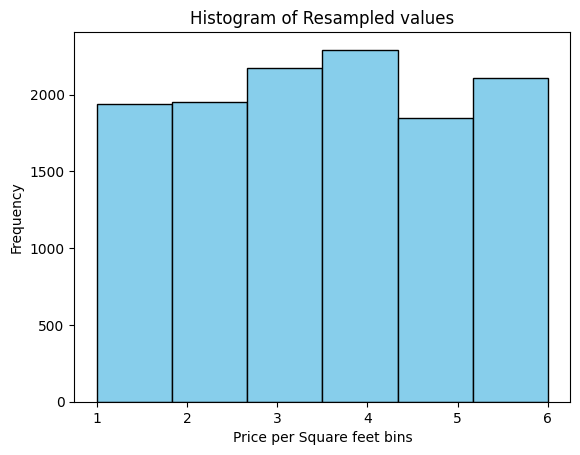

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data (replace this with your dataset)
d = y_resampled#data_clean_filtered['price_sqft_class']

# Plot histogram
plt.hist(d, bins=6, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Price per Square feet bins')
plt.ylabel('Frequency')
plt.title('Histogram of Resampled values')

# Show the plot
plt.show()

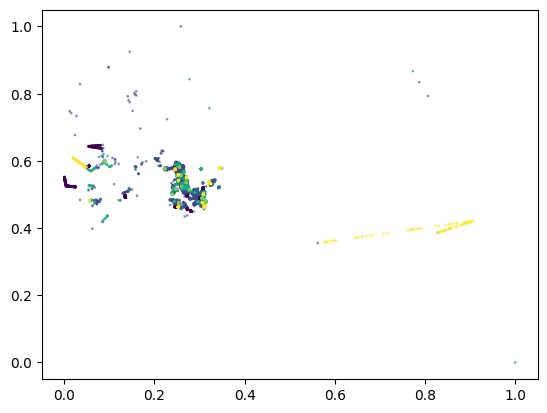

In [ ]:
plt.figure()
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,alpha=0.5,s=1)

In [ ]:
class KNNClassifier():

  def fit(self, X, y):
    self.X=X
    self.y=y

  def predict(self, X, K, epsilon =1e-3):

    N=len(X)
    y_hat = np.zeros(N)
    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt  = np.argsort(dist2)[: K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights= gamma_k).argmax()

    return y_hat

In [ ]:
knn = KNNClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split_custom(X_resampled, y_resampled, test_size=0.1)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_hat = knn.predict(X_test,3)

In [ ]:
print(accuracy_score(y_test,y_hat))
print(y_hat)

0.8365853658536585
[6. 2. 3. ... 3. 3. 5.]


## Regression to predict house prices

In [ ]:
def OLS(Y, Y_hat,N):
  return (1/(2*N))*(np.sum((Y_hat-Y)**2))

def R2(Y, Y_hat,):
  return (1-(np.sum((Y-Y_hat)**2))/np.sum(Y-np.mean(Y)))

In [ ]:
class MVLinearRegression():
  def fit(self, X, y, eta = 1e-3, epochs=1e3, show_curve = False):
    epochs = int(epochs)
    N, D  =  X.shape
    Y  = y

    #Begin Optimization
    self.W = np.random.randn(D)
    J  = np.zeros(epochs)

    #SGD
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      J[epoch] = OLS(Y,Y_hat,N)

      #Weight update
      self.W -= eta * ((1/N)*(X.T@(Y_hat-Y)))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("Epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training curve")
      plt.show()

  def predict(self, X):
    return X@self.W


### Data Preparation for regression model

In [ ]:
data_regression  = final_df.drop(columns=['zipcode', 'longitude', 'latitude'])

In [ ]:
print(data_regression.columns)
data_regression[data_regression['sold_price']<1000000].head(5)

Index(['sold_price', 'lot_acres', 'taxes', 'bedrooms', 'bathrooms', 'sqrt_ft',
       'garage', 'fireplaces', 'price_sqft', 'years_since_built', 'Carpet',
       'Ceramic Tile', 'Natural Stone', 'Wood', 'Concrete', 'Mexican Tile',
       'Other', 'Oven', 'Microwave', 'Gas Range', 'Appliance Color: Stainless',
       'Island', 'Double Sink', 'Countertops: Granite', 'Pantry: Walk-In',
       'Compactor', 'Pantry: Closet', 'price_sqft_class'],
      dtype='object')


,sold_price,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,price_sqft,years_since_built,...,Microwave,Gas Range,Appliance Color: Stainless,Island,Double Sink,Countertops: Granite,Pantry: Walk-In,Compactor,Pantry: Closet,price_sqft_class
141,169000.0,0.000936,0.000007,0.176471,0.057143,0.076648,0.066667,0.000000,0.037128,0.000495,...,0,0,0,0,0,0,0,0,0,1
287,910000.0,0.104392,0.000379,0.117647,0.057143,0.298927,0.233333,0.333333,0.180503,0.015849,...,1,0,0,0,0,0,0,0,0,3
437,900000.0,0.002430,0.000906,0.235294,0.114286,0.536408,0.100000,0.333333,0.098283,0.002972,...,0,0,0,0,0,0,0,0,0,2
484,950000.0,0.007919,0.001080,0.117647,0.171429,0.704394,0.133333,0.333333,0.075526,0.005448,...,0,0,0,0,0,0,0,0,0,2
561,950000.0,0.001890,0.000707,0.176471,0.114286,0.419903,0.066667,0.111111,0.138837,0.014859,...,1,0,0,0,0,0,0,0,0,3


In [ ]:
X = data_regression.drop(columns=['sold_price','price_sqft']).to_numpy()
y = data_regression['sold_price'].to_numpy()

In [ ]:
# X.columns

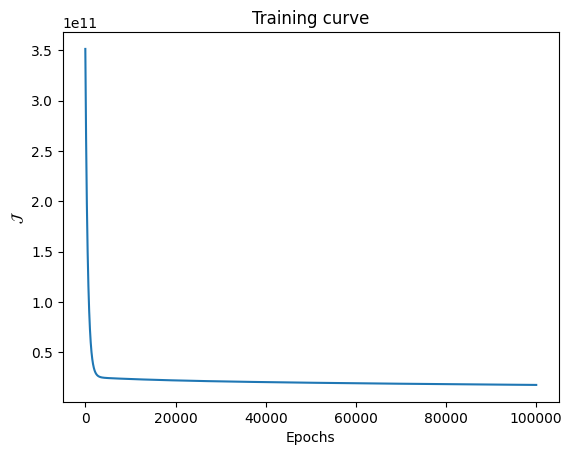

In [ ]:
my_reg = MVLinearRegression()
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.1)
my_reg.fit(X_train, y_train, epochs=1e5, eta = 1e-4, show_curve= True)

In [ ]:
pred = my_reg.predict(X_test)

In [ ]:
print(np.mean(np.abs(pred-y_test)/y_test)*100,'%')

15.43604467713243 %


In [ ]:
OLS(Y=y_test,Y_hat=pred,N=y_test.shape[0])

13078693543.887804

In [ ]:
mae = np.mean(np.abs(pred-y_test))
mse = np.mean((y_test - pred)**2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
range_y = np.max(y_test) - np.min(y_test)

# Calculate the percentage of RMSE out of 100
percentage_rmse = (rmse / range_y) * 100

print('Mean absolute error : ', mae,'\nMean Squared error : ',
       mse,'\nRoot Mean Squared Error', rmse,'\nPercentage RMSE : ',percentage_rmse,'%')

Mean absolute error :  119325.9384186484 
Mean Squared error :  26157387087.775608 
Root Mean Squared Error 161732.4552703495 
Percentage RMSE :  9.351367111206871 %


## Testing the Pipeline


### Splitting the lat and long and zipcode for KNN to classify

In [ ]:
final_test_df.head(10)

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,...,Microwave,Gas Range,Appliance Color: Stainless,Island,Double Sink,Countertops: Granite,Pantry: Walk-In,Compactor,Pantry: Closet,price_sqft_class
4488,570000.0,0.524481,0.557201,0.257535,0.000828,0.000349,0.176471,0.085714,0.259198,0.066667,...,0,1,1,1,1,0,0,0,0,2
4489,570000.0,0.524481,0.543416,0.263506,0.000522,0.000441,0.117647,0.028571,0.225345,0.066667,...,0,0,0,0,1,0,0,0,1,2
4490,548000.0,0.523651,0.559092,0.253228,0.001458,0.000452,0.176471,0.057143,0.250511,0.100000,...,0,0,0,1,1,0,0,0,1,2
4491,560000.0,0.524481,0.544414,0.256692,0.001458,0.000583,0.117647,0.085714,0.262647,0.100000,...,0,0,1,1,0,0,1,0,0,2
4492,575000.0,0.523651,0.582161,0.252576,0.002034,0.000452,0.235294,0.085714,0.300588,0.100000,...,0,1,1,1,1,1,1,0,0,2
4493,546000.0,0.528631,0.500417,0.303740,0.000414,0.000106,0.176471,0.057143,0.194813,0.100000,...,0,1,1,1,0,1,1,0,0,3
4494,550000.0,0.518672,0.461861,0.272388,0.006012,0.000560,0.176471,0.085714,0.260858,0.100000,...,0,1,0,0,1,0,0,0,0,2
4495,560000.0,0.497925,0.527989,0.260666,0.005940,0.000426,0.176471,0.057143,0.236076,0.133333,...,0,0,1,1,0,0,0,0,1,2
4496,538000.0,0.492946,0.532823,0.252436,0.001170,0.000392,0.117647,0.057143,0.259070,0.000000,...,0,1,1,0,0,0,0,0,0,2
4497,575000.0,0.523651,0.581361,0.252893,0.001800,0.000439,0.176471,0.085714,0.247828,0.100000,...,0,0,1,1,1,1,0,0,1,2


In [ ]:
X_test = final_test_df[['latitude','longitude']].to_numpy()
y_hat = knn.predict(X_test,1)

In [ ]:
accuracy_score(y_hat,final_test_df['price_sqft_class'])

0.6

### Replace Price/Sqft with KNN class output

In [ ]:
final_test_df['price_sqft_class1'] = y_hat

<ipython-input-517-3b618f6b30be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_df['price_sqft_class1'] = y_hat


In [ ]:
final_test_df.columns

Index(['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes',
       'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces',
       'price_sqft', 'years_since_built', 'Carpet', 'Ceramic Tile',
       'Natural Stone', 'Wood', 'Concrete', 'Mexican Tile', 'Other', 'Oven',
       'Microwave', 'Gas Range', 'Appliance Color: Stainless', 'Island',
       'Double Sink', 'Countertops: Granite', 'Pantry: Walk-In', 'Compactor',
       'Pantry: Closet', 'price_sqft_class', 'price_sqft_class1'],
      dtype='object')

In [ ]:
X_test_final = final_test_df.drop(columns=['sold_price','price_sqft','zipcode', 'longitude', 'latitude','price_sqft_class'])
y_test_final = final_test_df['sold_price']

In [ ]:
X_test_final.columns

Index(['lot_acres', 'taxes', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'fireplaces', 'years_since_built', 'Carpet', 'Ceramic Tile',
       'Natural Stone', 'Wood', 'Concrete', 'Mexican Tile', 'Other', 'Oven',
       'Microwave', 'Gas Range', 'Appliance Color: Stainless', 'Island',
       'Double Sink', 'Countertops: Granite', 'Pantry: Walk-In', 'Compactor',
       'Pantry: Closet', 'price_sqft_class1'],
      dtype='object')

In [ ]:
pred = my_reg.predict(X_test_final)

In [ ]:
print(np.mean(np.abs(pred-y_test_final)/y_test_final)*100,'%')

28.867652324775054 %


In [ ]:
OLS(Y=y_test_final,Y_hat=pred,N=y_test_final.shape[0])

21054020241.413548

In [ ]:
mae = np.mean(np.abs(pred-y_test_final))
mse = np.mean((y_test_final - pred)**2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
range_y = np.max(y_test_final) - np.min(y_test_final)

# Calculate the percentage of RMSE out of 100
percentage_rmse = (rmse / range_y) * 100

print('Mean absolute error : ', mae)

Mean absolute error :  155563.7757249721


## Predict New Data Point

In [ ]:
X_test_final.shape

(505, 26)

In [ ]:
from IPython.display import clear_output

cols = ['lot_acres', 'taxes', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'fireplaces', 'years_since_built', 'Carpet', 'Ceramic Tile',
       'Natural Stone', 'Wood', 'Concrete', 'Mexican Tile', 'Other', 'Oven',
       'Microwave', 'Gas Range', 'Appliance Color: Stainless', 'Island',
       'Double Sink', 'Countertops: Granite', 'Pantry: Walk-In', 'Compactor',
       'Pantry: Closet', 'latitude', 'longitude']
X_dataPoint = []

for col in cols:
  print('Enter the value for : ',col)
  x = float(input())
  X_dataPoint.append(x)
  clear_output(wait=True)


Enter the value for :  garage


In [ ]:
# cols = X_testing_point.columns
# X_dataPoint = [0.39,2000,3,3,5386,1,1,35,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,34.185,-110.971]

# for col in cols:
#   print('Enter the value for : ',col)
#   x = float(input())
#   X_dataPoint.append(x)

In [ ]:
X_dataPoint = np.array(X_dataPoint).reshape(1,27)
X_testData_df = pd.DataFrame(X_dataPoint, columns=cols)

In [ ]:
X_testData_df.head(10)

,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,years_since_built,Carpet,Ceramic Tile,...,Gas Range,Appliance Color: Stainless,Island,Double Sink,Countertops: Granite,Pantry: Walk-In,Compactor,Pantry: Closet,latitude,longitude
0,1.0,1.0,1.0,1.0,1000.0,1.0,0.0,40.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.3455,-110.5654


In [ ]:
for col in ['longitude', 'latitude', 'lot_acres', 'taxes',
       'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces',
       'years_since_built']:
  X_testData_df[col] = (X_testData_df[col] - statistics_df[col]['min']) / (statistics_df[col]['max'] - statistics_df[col]['min'])

  # X_testData_df[col] = (X_testData_df[col] - statistics_df[col]['mean']) / (statistics_df[col]['std'] + 1e-9 )


In [ ]:
X_test = X_testData_df[['latitude','longitude']].to_numpy() #np.array([[ 32.2469718 , -110.8950444 ]]) need to normalize then will work#
y_hat = knn.predict(X_test,1)
X_testData_df['price_sqft_class'] = y_hat
print('Predicted Price/Sqft Bin : ',y_hat)
# print(X_testData_df.head(1))

Predicted Price/Sqft Bin :  [2.]


In [ ]:
X_test_final = X_testData_df.drop(columns=['latitude','longitude']).to_numpy()
pred = my_reg.predict(X_test_final)
print('Prediction : $',round(pred[-1],2))

Prediction : $ 600909.46
